In [71]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.metrics import accuracy_score
import statistics

# part A

In [2]:
data = pd.read_csv("HCV.csv")
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
data['Sex'].replace(['m', 'f'],
                    [0, 1], inplace=True)
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
data['Category'].replace(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'],
                         [0, 0, 1, 2, 3], inplace=True)
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [5]:
data['CHOL'].max(), data['CHOL'].min()

(9.67, 1.43)

In [6]:
data['ALB'].max(), data['ALB'].min()

(82.2, 14.9)

In [7]:
data.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [8]:
data['ALP'].fillna(data['ALP'].mean(), inplace=True)
data['ALB'].fillna(data['ALB'].mean(), inplace=True)
data['ALT'].fillna(data['ALT'].mean(), inplace=True)
data['CHOL'].fillna(data['CHOL'].mean(), inplace=True)
data['PROT'].fillna(data['PROT'].mean(), inplace=True)
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [9]:
data.drop(columns="Unnamed: 0", inplace=True)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [10]:
data_Y = data['Category']
data_X = data.drop(columns='Category')
data_Y

0      0
1      0
2      0
3      0
4      0
      ..
610    3
611    3
612    3
613    3
614    3
Name: Category, Length: 615, dtype: int64

In [11]:
normalized_dataX = (data_X - data_X.mean()) / data_X.std()
normalized_dataX

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.532369,-0.793897,-0.540208,-0.615503,-0.815390,-0.383381,-0.198074,-0.574266,-1.903127,0.496666,-0.501878,-0.563913
1,-1.532369,-0.793897,-0.540208,0.078618,-0.410658,-0.304809,-0.381065,1.348063,-0.505666,-0.146470,-0.437847,0.825430
2,-1.532369,-0.793897,0.914106,0.250199,0.304499,0.538328,-0.269237,0.291689,-0.149625,0.094706,-0.115863,1.344118
3,-1.532369,-0.793897,0.273516,-0.635000,0.084451,-0.368271,0.381396,-0.392914,-0.559073,-0.025882,-0.104886,0.677233
4,-1.532369,-0.793897,-0.419015,0.226801,0.163040,-0.301787,-0.091330,0.432237,-0.932915,-0.106274,-0.176235,-0.619487
...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.451190,1.257560,-1.665569,13.582775,-0.886120,2.282021,1.962230,-1.190862,0.829487,-0.514264,11.184684,-0.656536
611,1.650094,1.257560,-3.050630,1.345973,-1.004003,0.290525,0.437309,-3.017982,-2.090048,-0.367549,-0.066467,-0.137848
612,1.650094,1.257560,-2.184967,0.741542,-0.980426,1.940535,1.860569,-2.963577,-1.547086,-0.293186,0.451269,1.844281
613,-0.140041,1.257560,-1.492437,0.000000,0.414524,0.822396,0.437309,-2.102155,-1.039728,-0.588627,0.191486,-0.193422


# Part B

In [12]:
X_train = normalized_dataX.to_numpy()
m, n = X_train.shape
m, n

(615, 12)

In [13]:
def KMeans(X_train: pd.DataFrame, ClusterCount=2, iteration=30, ConvergenceRatio=0.01,
           DistanceMetric="Euclidean") -> list:
    if X_train.__class__ is not np.ndarray:
        X_train = X_train.to_numpy()

    m, n = X_train.shape
    centers = np.zeros((ClusterCount, n))

    distance_function = norm2
    if DistanceMetric == "CityBlock":
        distance_function = norm1

    for i in range(ClusterCount):
        centers[i, :] = X_train[random.randint(0, m - 1), :]

    iterations_counts = 0
    while True:
        iterations_counts += 1
        clusters = []
        for i in range(ClusterCount):
            clusters.append(set())

        # m is number of rows
        # assign each row to one cluster
        for i in range(m):
            dists = []
            for center_index in range(ClusterCount):
                dists.append(distance_function(X_train[i, :] - centers[center_index, :]))

            dists = np.array(dists)
            min_cluster_index = np.where(dists == dists.min())[0][0]
            clusters[min_cluster_index].add(i)

        # update centroids
        new_centers = np.zeros((ClusterCount, n), dtype=float)
        for i in range(ClusterCount):
            sum_vectors = np.zeros(n)
            for row_number in clusters[i]:
                sum_vectors += X_train[row_number, :]
            if len(clusters[i]) != 0:
                new_centers[i, :] = sum_vectors / len(clusters[i])
            else:
                # two way to handle empty clusters
                # new_centers[i, :] = centers[i,:] # if there is no membership in cluster dont move
                new_centers[i, :] = X_train[random.randint(0, m - 1), :]  # make new random centroid

        # check convergence with distance
        if check_convergence(centers, new_centers, distance_function, convergence_ratio=ConvergenceRatio):
            centers = new_centers
            break
        centers = new_centers
        # check convergence with iterations
        if iterations_counts >= iteration:
            break

    return centers

In [14]:
def norm1(input: np.ndarray):
    return np.sum(np.abs(input))

In [15]:
def norm2(input: np.ndarray):
    return math.sqrt(np.sum(np.power(input, 2)))

In [16]:
def check_convergence(first: np.ndarray, second: np.ndarray, distance_function, convergence_ratio=0.01) -> bool:
    if convergence_ratio > distance_function(first - second):
        return True
    else:
        return False

In [17]:
KMeans(normalized_dataX, 3, 30)

array([[-0.07969011, -0.78220828,  0.30006275, -0.05411967,  0.17302004,
        -0.02440034, -0.06534982,  0.29524107,  0.07854554,  0.05744713,
        -0.01736382,  0.18514441],
       [-0.01713778,  1.23964365, -0.14245618, -0.07810995, -0.26435955,
        -0.29115066, -0.21556552, -0.16729355,  0.06721976, -0.23439261,
        -0.28982859, -0.0610804 ],
       [ 0.91130805, -0.26637977, -2.07713023,  1.0538052 , -0.00547708,
         2.14965774,  2.06577977, -1.86626839, -1.22750885,  0.95748468,
         2.07044138, -1.45709362]])

# part C

In [18]:
def find_my_cluster_and_distance(input: np.ndarray, centers: np.ndarray, distance_function):
    number_of_centers = centers.shape[0]

    dists = []
    for center_index in range(number_of_centers):
        dists.append(distance_function(input - centers[center_index, :]))

    dists = np.array(dists)
    min_dists = dists.min()
    min_cluster_index = np.where(dists == min_dists)[0][0]

    return min_dists, min_cluster_index

In [19]:
def inertia_calculator(distance_list: list):
    distance_list = np.array(distance_list)
    return np.sum(np.power(distance_list, 2))

find best K

In [20]:
import matplotlib.pyplot as plt

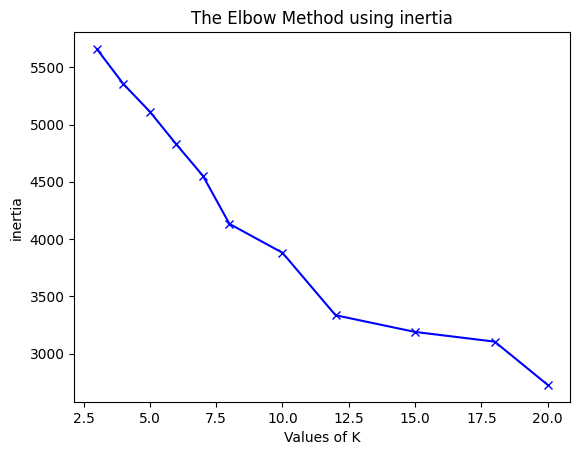

In [21]:
K = [3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 20]

clusters_inertia = []
numpy_data_X = normalized_dataX.to_numpy()
m, n = numpy_data_X.shape
for k in K:
    centers = KMeans(numpy_data_X, k, 30)
    distances = []
    for i in range(m):
        min_dist, _ = find_my_cluster_and_distance(numpy_data_X[i, :], centers, norm2)
        distances.append(min_dist)

    clusters_inertia.append(inertia_calculator(distances))

plt.plot(K, clusters_inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertia')
plt.title('The Elbow Method using inertia')
plt.show()

In [22]:
centers = KMeans(numpy_data_X, 12, 30)

In [23]:
distances = []
m = numpy_data_X.shape[0]
for i in range(m):
    min_dist, _ = find_my_cluster_and_distance(numpy_data_X[i, :], centers, norm2)
    distances.append(min_dist)
distances = sorted(distances)

X = np.arange(1, m + 1)

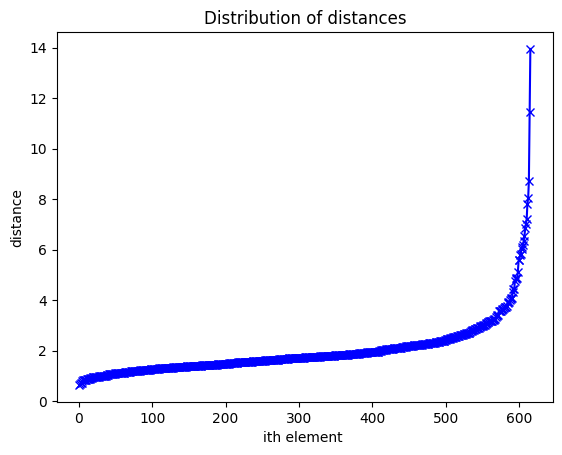

In [24]:
plt.plot(X, distances, 'bx-')
plt.xlabel('ith element ')
plt.ylabel('distance')
plt.title('Distribution of distances')
plt.show()

above 4 must be deleted

In [25]:
number_of_remove = 0
threshold = 4
for i in range(m):
    min_dist, _ = find_my_cluster_and_distance(numpy_data_X[i, :], centers, norm2)
    if min_dist > threshold:
        number_of_remove += 1
        normalized_dataX.drop(i, axis=0, inplace=True)
        data_Y.drop(i, axis=0, inplace=True)

In [26]:
print(f'{number_of_remove / m * 100}% detected as outlier')

4.5528455284552845% detected as outlier


In [27]:
normalized_dataX.shape

(587, 12)

# Part D

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
X_train, X_test, y_train, y_test = train_test_split(normalized_dataX, data_Y, test_size=0.2, random_state=55)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((469, 12), (118, 12), (469,), (118,))

In [30]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


# Part E

this box convert 1 ,2 ,3 labels to 1

In [62]:
# this box convert 1 ,2 ,3 labels to 1
def convert_labels(x):
    if x == 0:
        return 0
    else:
        return 1


convertor = np.vectorize(convert_labels)
y_test_2_label = convertor(y_test)
y_train_2_label = convertor(y_train)

clustering

In [32]:
number_of_clusters = 2
centers = KMeans(X_train, number_of_clusters, 30)

In [33]:
clusters = []  # each item in list is a cluster (list) and each element inside cluster is label of one member
for i in range(number_of_clusters):
    clusters.append([])

# find each row data in which cluster and what is the correct label
for i in range(X_train.shape[0]):
    _, cluster_id = find_my_cluster_and_distance(X_train[i, :], centers, norm2)
    clusters[cluster_id].append(y_train_2_label[i])

way 1 to define cluster label (maximum frequency)

In [35]:
center_labels1 = []  # each cluster must have label
for cluster_index in range(number_of_clusters):
    cluster_label = statistics.mode(clusters[cluster_index])
    center_labels1.append(cluster_label)
center_labels1

[0, 0]

way 2 to find label of the clusters


In [36]:
labels_count = np.array(np.unique(y_train_2_label, return_counts=True)).T
labels_count

array([[  0, 427],
       [  1,  42]], dtype=int64)

In [37]:
def count_number_of_freq(ls, item):
    counter = 0
    for label in ls:
        if label == item:
            counter += 1
    return counter

In [38]:

center_labels2 = np.zeros(number_of_clusters, dtype=int)
for label in range(labels_count.shape[0]):
    max = 0
    max_id = 0
    for cluster_index in range(len(clusters)):
        count = count_number_of_freq(clusters[cluster_index], label)
        if count > max:
            max = count
            max_id = cluster_index

    center_labels2[max_id] = label
center_labels2

array([0, 1])

now define predication

In [39]:
def pred_by_centers(vectors, centers: np.ndarray, center_labels, distance_function=norm2):
    preds = []

    for vector in vectors:
        ClusterCount, _ = centers.shape
        dists = []
        for center_index in range(ClusterCount):
            dists.append(distance_function(vector - centers[center_index, :]))

        dists = np.array(dists)
        min_cluster_index = np.where(dists == dists.min())[0][0]
        # print(min_cluster_index)
        # print(center_labels[int(min_cluster_index)])
        preds.append(center_labels[min_cluster_index])

    return preds

In [40]:
center_labels1

[0, 0]

In [47]:
preds1 = pred_by_centers(X_test, centers, center_labels1, distance_function=norm2)
preds2 = pred_by_centers(X_test, centers, center_labels2, distance_function=norm2)

# metrics

In [54]:
def purity_of_one_cluster_calculator(cluster: list, label):
    count = 0
    for item in cluster:
        if item == label:
            count += 1
    return count / len(cluster)

In [60]:
def purity_calculator(clusters: list , labels):
    sum_size = 0
    sum_value = 0
    for cluster_index in  range(len(clusters)):
        sum_value += purity_of_one_cluster_calculator(clusters[cluster_index] , labels[cluster_index]) * len(clusters[cluster_index])
        sum_size += len(clusters[cluster_index])

    return sum_value / sum_size


In [46]:
import collections
import math


def entropy_calculator(clusters: list):
    sum_of_lengths = 0
    result = 0
    for cluster in clusters:
        frequency = collections.Counter(cluster)
        length = len(cluster)
        sum_of_lengths += length
        sum = 0
        for key in frequency.keys():
            p = frequency[key] / length
            sum += -p * math.log2(p)
        result += sum * length

    result /= sum_of_lengths
    return result

evaluate

In [50]:
print(f'way1 accuracy : {accuracy_score(y_test_2_label,preds1)}')
print(f'way2 accuracy : {accuracy_score(y_test_2_label,preds2)}')

way1 accuracy : 0.8983050847457628
way2 accuracy : 0.4576271186440678


In [52]:
entropy = entropy_calculator(clusters)
print(f'way1 entropy : {entropy}')
print(f'way2 entropy : {entropy}')

way1 entropy : 0.4320447046064277
way2 entropy : 0.4320447046064277


In [61]:
way1_purity = purity_calculator(clusters , center_labels1)
way2_purity =purity_calculator(clusters , center_labels2)
print(f'way1 purity : {way1_purity}')
print(f'way2 purity : {way2_purity}')

way1 purity : 0.9104477611940298
way2 purity : 0.4626865671641791


# part F

In [73]:
number_of_clusters = 4
centers = KMeans(X_train, number_of_clusters, 30)

In [74]:
clusters = []  # each item in list is a cluster (list) and each element inside cluster is label of one member
for i in range(number_of_clusters):
    clusters.append([])

# find each row data in which cluster and what is the correct label
for i in range(X_train.shape[0]):
    _, cluster_id = find_my_cluster_and_distance(X_train[i, :], centers, norm2)
    clusters[cluster_id].append(y_train[i])

way 1

In [75]:
import statistics
center_labels1 = []  # each cluster must have label
for cluster_index in range(number_of_clusters):
    votes = clusters[cluster_index]
    cluster_label = statistics.mode(votes)
    center_labels1.append(cluster_label)
center_labels1

[0, 0, 0, 0]

way 2

In [78]:
labels_count = np.array(np.unique(y_train, return_counts=True)).T
labels_count

array([[  0, 427],
       [  1,  17],
       [  2,  15],
       [  3,  10]], dtype=int64)

In [79]:
center_labels2 = np.zeros(number_of_clusters, dtype=int)
for label in range(labels_count.shape[0]):
    max = 0
    max_id = 0
    for cluster_index in range(len(clusters)):
        count = count_number_of_freq(clusters[cluster_index], label)
        if count > max:
            max = count
            max_id = cluster_index

    center_labels2[max_id] = label
center_labels2

array([0, 3, 0, 2])

In [80]:
preds1 = pred_by_centers(X_test, centers, center_labels1, distance_function=norm2)
preds2 = pred_by_centers(X_test, centers, center_labels2, distance_function=norm2)

evaluation

In [81]:
print(f'way1 accuracy : {accuracy_score(y_test,preds1)}')
print(f'way2 accuracy : {accuracy_score(y_test,preds2)}')

way1 accuracy : 0.8983050847457628
way2 accuracy : 0.5932203389830508


In [82]:
entropy = entropy_calculator(clusters)
print(f'way1 entropy : {entropy}')
print(f'way2 entropy : {entropy}')

way1 entropy : 0.503423806390791
way2 entropy : 0.503423806390791


In [83]:
way1_purity = purity_calculator(clusters, center_labels1)
way2_purity = purity_calculator(clusters, center_labels2)
print(f'way1 purity : {way1_purity}')
print(f'way2 purity : {way2_purity}')

way1 purity : 0.9104477611940298
way2 purity : 0.5991471215351812
